In [62]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
def norm(data):
        if(data.all() == 0):
              return data
        min = np.min(data)
        max = np.max(data)
        range = max-min
        if(range == 0):
            return np.zeros_like(data)
        data_norm = (data - min)/range
        return data_norm

In [111]:
def load_data(normalize_type):
    data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
    train, test = train_test_split(data, train_size=0.75, random_state=10)

    x_train = np.array(train['Experience Years'])
    y_train = np.array(train['Salary'])
    x_test = np.array(test['Experience Years'])
    y_test = np.array(test['Salary'])

    x_train = np.reshape(x_train, (x_train.shape[0], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], 1))
    y_test = np.reshape(y_test, (y_test.shape[0], 1))

    if(normalize_type == 'min_max'):
        x_train = norm(x_train)
        y_train = norm(y_train)
        x_test = norm(x_test)
        y_test = norm(y_test)
    elif(normalize_type == 'scale'):
        y_train = y_train/10000
        y_test = y_test/10000
        
    training_data = {'x_train':x_train, 'y_train':y_train}
    testing_data = {'x_test':x_test, 'y_test':y_test}
    return training_data, testing_data


In [16]:
def initialize_parameters():
    w = np.random.rand(1,1) * 0.1
    b = np.zeros((1,1))
    parameters = {'w':w, 'b':b}
    return parameters

In [17]:
def forward_propagation(x, parameters):
    w, b = parameters['w'], parameters['b']
    yhat = np.matmul(x, w) + b
    yhat = np.reshape(yhat, (yhat.shape[0], 1))
    return yhat

In [18]:
def calculate_cost(yhat, y):
    m = y.shape[0]
    error = yhat - y
    squared_error = error ** 2
    cost = np.sum(squared_error, 0)/m
    intermediate_values = {'error':error}
    return cost, intermediate_values

In [19]:
def back_propagation(x, intermediate_values):
    m = x.shape[0]
    error = intermediate_values['error']
    dw = x * (2 * error) * (1/m)
    dw = np.sum(dw, axis=0, keepdims=True)
    db = (2 * error) * (1/m)
    db = np.sum(db, axis=0, keepdims=True)
    grads = {'dw':dw, 'db':db}
    return grads

In [20]:
def update_parameters(parameters, grads, learning_rate=0.1):
    w, b = parameters['w'], parameters['b']
    dw, db = grads['dw'], grads['db']
    w = w - learning_rate * dw
    b = b - learning_rate * db
    parameters = {'w':w, 'b':b}
    return parameters

In [25]:
def save_parameters(model, parameters):
    path = '../src/models/' + model
    for p in parameters:
        parameter_path = path + '/' + p + '.npy'
        np.save(parameter_path, parameters[p])

In [132]:
def load_parameters(model,logging=False):
    path = '../src/models/' + model
    parameters = initialize_parameters()
    if not os.path.exists(path):
        os.makedirs(path)
        if(logging):
            print(f'created model {model} with default parameter values')
        return parameters
    for p in parameters:
        parameter_path = path + '/' + p + '.npy'
        try:
            parameters[p] = np.load(parameter_path)
            if(logging):
                print(f'loaded parameter {p} with value {parameters[p]}')
        except FileNotFoundError:
            if(logging):
                print(f'could not find parameter {p}, continuing with default value {parameters[p]}')
    return parameters

In [133]:
def train_model(model, epochs, learning_rate, training_data, logging=False):
    x_train = training_data['x_train']
    y_train = training_data['y_train']
    parameters = load_parameters(model)
    for epoch in range(epochs):
        yhat = forward_propagation(x_train, parameters)
        cost, intermediate_values = calculate_cost(yhat, y_train)
        if(logging):
            print(f'epoch: {epoch}    cost: {cost}')
        grads = back_propagation(x_train, intermediate_values)
        parameters = update_parameters(parameters, grads, learning_rate)
    save_parameters(model, parameters)
    if(logging):
        print(f'parameters saved: {parameters}    final cost: {cost}')

In [139]:
def predict(model, x, logging=False):
    parameters = load_parameters(model)
    yhat = forward_propagation(x, parameters)
    if(logging):
        print(f'{model} prediction: {yhat}')
    return yhat

In [120]:
training_data, testing_data = load_data(normalize_type='scale')

In [ ]:
model = 'trained_model2'
epochs = 5000
learning_rate = 0.01
logging = True

train_model(model, epochs, learning_rate, training_data, logging)

In [140]:
model = 'trained_model2'
logging = True
x = np.array([[7.7]])
predict(model, x, logging)

trained_model2 prediction: [[9.88566824]]


array([[9.88566824]])

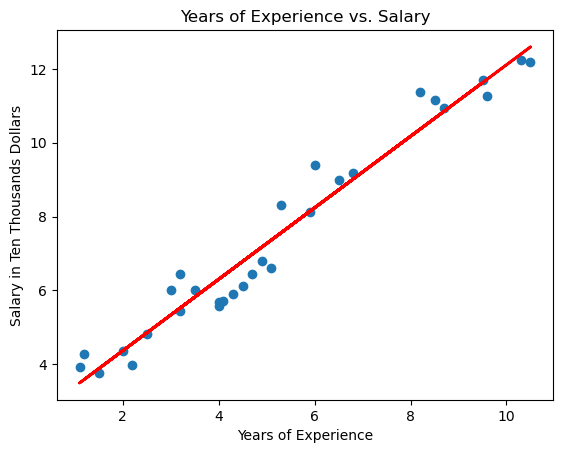

In [130]:
model = 'trained_model2'
x = training_data['x_train']
y = training_data['y_train']

plt.scatter(x, y)
w = np.load('../src/models/' + model + '/w.npy')
b = np.load('../src/models/' + model + '/b.npy')
line = w * x + b
plt.plot(x, line, color='red', linestyle='-', linewidth=2, label='wx + b')
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in Ten Thousands Dollars')
plt.show()

trained_model2 prediction: [[4.36694266]]


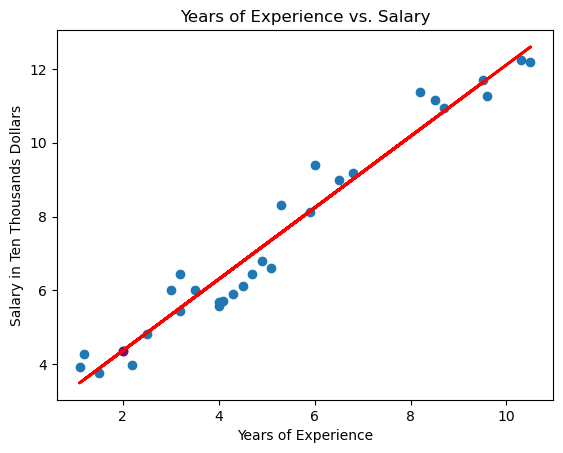

In [150]:
model = 'trained_model2'
x = training_data['x_train']
y = training_data['y_train']

plt.scatter(x, y)
w = np.load('../src/models/' + model + '/w.npy')
b = np.load('../src/models/' + model + '/b.npy')
line = w * x + b
plt.plot(x, line, color='red', linestyle='-', linewidth=2, label='wx + b')

x_predict = np.array([[2]])
y_predict = predict(model, x_predict, logging=True)
plt.scatter(x_predict, y_predict, color='purple')

plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in Ten Thousands Dollars')
plt.show()

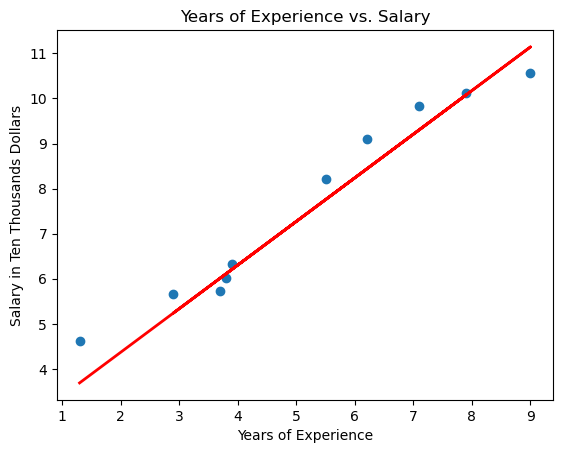

In [151]:
model = 'trained_model2'
x = testing_data['x_test']
y = testing_data['y_test']

plt.scatter(x, y)
w = np.load('../src/models/' + model + '/w.npy')
b = np.load('../src/models/' + model + '/b.npy')
line = w * x + b
plt.plot(x, line, color='red', linestyle='-', linewidth=2, label='wx + b')
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in Ten Thousands Dollars')
plt.show()